In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import regularizers 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

First, I imported all of the libraries I was thinking about using ended up not needing all of them. 
As of August 2nd, tensorflow does not work with Python 3.8 so make sure that you are using 
3.7 for compatability. 

In [16]:
Generator = ImageDataGenerator(rescale = 1/.255)

train_gen = Generator.flow_from_directory('data/chest_xray/train',
            target_size = (150, 150),
            class_mode = 'binary',
            color_mode='grayscale'
            )

test_gen =  Generator.flow_from_directory('data/chest_xray/test',
            target_size = (150, 150),
            class_mode = 'binary',
            color_mode='grayscale'
         )

val_gen = Generator.flow_from_directory('data/chest_xray/val',
            target_size = (150, 150),
            class_mode = 'binary',
            color_mode='grayscale'
            )




Found 5217 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


I then created a directory and imported the images from my computer into the directory. Next,
I created a train generator, a test generator, and a validation generator and imported the images from 
the directory into the corresponding generator. 

In [18]:


baseline_m = Sequential()

baseline_m.add(Dense(75, activation='relu', input_shape =(150, 150, 1)))
baseline_m.add(Dense(25, activation='relu')) 
baseline_m.add(Flatten())
baseline_m.add(Dense(1, activation='sigmoid'))

baseline_m.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

Here, I created my baseline model. I guess you could argue I 75 is a pretty large number
to start a baseline with, but given the scope of the data I wanted to make sure I started large. 
I used relu and sigmoid, two of the most basic activation tools. I also used Adam as 
an optimizer, binary crossentropy, since since every collection of images was divided into 
two categories: PNEUMONIA and NORMAL. Lastly, I calculated for accuracy, precision and recall. 

In [12]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [19]:
baseline_m = baseline_m.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 184s 1s/step - loss: 373.2800 - accuracy: 0.8313 - precision_4: 0.8945 - recall_4: 0.8880 - val_loss: 31.0073 - val_accuracy: 0.6875 - val_precision_4: 0.6667 - val_recall_4: 1.0000
Epoch 2/10
164/164 [==============================] - 106s 644ms/step - loss: 3.7383 - accuracy: 0.9114 - precision_4: 0.9556 - recall_4: 0.9551 - val_loss: 1.8732 - val_accuracy: 0.8750 - val_precision_4: 0.8889 - val_recall_4: 1.0000
Epoch 3/10
164/164 [==============================] - 108s 659ms/step - loss: 2.7415 - accuracy: 0.8750 - precision_4: 0.9455 - recall_4: 0.9492 - val_loss: 6.7233 - val_accuracy: 0.5000 - val_precision_4: 0.5333 - val_recall_4: 1.0000
Epoch 4/10
164/164 [==============================] - 109s 663ms/step - loss: 0.3496 - accuracy: 0.0119 - precision_4: 0.9044 - recall_4: 0.9301 - val_loss: 0.6442 - val_accuracy: 0.0000e+00 - val_precision_4: 0.6154 - val_recall_4: 1.0000
Epoch 5/10
164/164 [==============================] 

This took about 10 minutes to run. 

In [22]:
acc = baseline_m.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(baseline_m.model.metrics_names,acc))

20/20 [==============================] - 9s 457ms/step - loss: 0.6505 - accuracy: 0.0000e+00 - precision_4: 0.7451 - recall_4: 0.9821


[('loss', 0.650493997335434),
 ('accuracy', 0.0),
 ('precision_4', 0.7451362),
 ('recall_4', 0.98205125)]

Here is a report of the scores. As you can see the accuracy is zero, which is a major problem.  

In [23]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

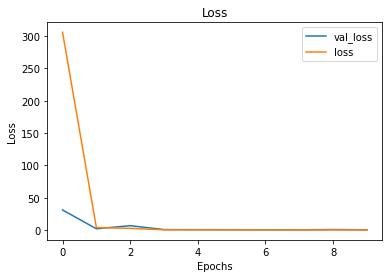

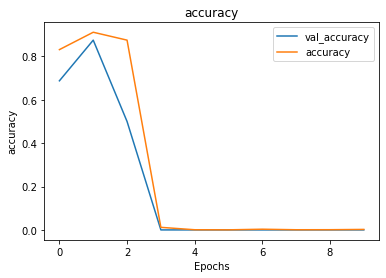

In [24]:
visualize_training_results(baseline_m)

Here is a simple plot of my baseline model. Obviously there is a lot of room for improvement. 

In [30]:

attempt_1 = Sequential() 
attempt_1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 1))) 
attempt_1.add(MaxPooling2D((2, 2))) 
attempt_1.add(Flatten()) 
attempt_1.add(Dense(75, activation='tanh'))
attempt_1.add(Dense(50, activation='tanh'))
attempt_1.add(Dense(25, activation='tanh'))
attempt_1.add(Dense(1, activation='softmax'))

attempt_1.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

In hindsight this was probably a mistake, but I panicked a bit, and decided to change nearly 
everything about my baseline model, given how bad the accuracy score was. I also, wanted to create a 
pretty big model, given the scope of the dataset, so I added a Convolution layer and a Max pooling layer.
I also added a another Dense layer, though I kept the same metrics to calculate

In [31]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [32]:
attempt_1 = attempt_1.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 92s 562ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_6: 0.7430 - recall_6: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_6: 0.5000 - val_recall_6: 1.0000
Epoch 2/10
164/164 [==============================] - 89s 543ms/step - loss: 4.0082 - accuracy: 0.7430 - precision_6: 0.7430 - recall_6: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_6: 0.5000 - val_recall_6: 1.0000
Epoch 3/10
164/164 [==============================] - 89s 541ms/step - loss: 4.0082 - accuracy: 0.7430 - precision_6: 0.7430 - recall_6: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_6: 0.5000 - val_recall_6: 1.0000
Epoch 4/10
164/164 [==============================] - 88s 539ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_6: 0.7430 - recall_6: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_6: 0.5000 - val_recall_6: 1.0000
Epoch 5/10
164/164 [==============================] - 88s 53

In [33]:
acc_1 = attempt_1.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_1.model.metrics_names,acc_1))

20/20 [==============================] - 7s 340ms/step - loss: 5.7500 - accuracy: 0.6250 - precision_6: 0.6250 - recall_6: 1.0000


[('loss', 5.7499646782875065),
 ('accuracy', 0.625),
 ('precision_6', 0.625),
 ('recall_6', 1.0)]

The scores are better, but it is massively overfit it appears. Also, precision and accuracy having the same score, this might be buggy. 

In [34]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

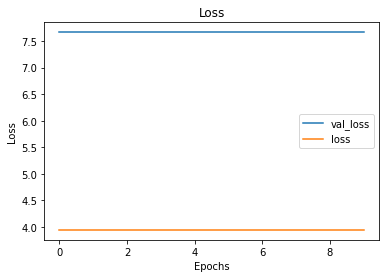

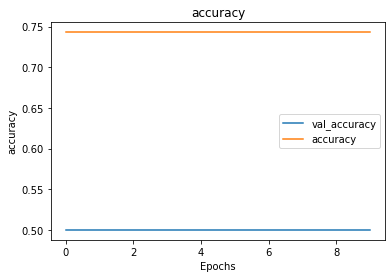

In [35]:
visualize_training_results(attempt_1)

Something is clearly wrong, since the graph should not look like this. Lets keep going and see if we 
can figure out what's wrong

In [36]:

attempt_2 = Sequential() 
attempt_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 1))) 
attempt_2.add(MaxPooling2D((2, 2))) 
attempt_2.add(Flatten()) 
attempt_2.add(Dense(75, activation='relu'))
attempt_2.add(Dense(50, activation='relu'))
attempt_2.add(Dense(1, activation='softmax'))

attempt_2.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

I changed the acivations tanh to relu. I also changed the optimizer to sgd and removed a dense layer. 
Obviously, in normal cases, one should not change multiple parameters, since it would make figuring out
what is wrong a guessing game, but I wanted to see if anything changed since it appeared my model was 
bugged. 


In [37]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [38]:
attempt_2 = attempt_2.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 103s 629ms/step - loss: 4.0082 - accuracy: 0.7430 - precision_7: 0.7430 - recall_7: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_7: 0.5000 - val_recall_7: 1.0000
Epoch 2/10
164/164 [==============================] - 82s 498ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_7: 0.7430 - recall_7: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_7: 0.5000 - val_recall_7: 1.0000
Epoch 3/10
164/164 [==============================] - 84s 512ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_7: 0.7430 - recall_7: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_7: 0.5000 - val_recall_7: 1.0000
Epoch 4/10
164/164 [==============================] - 81s 493ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_7: 0.7430 - recall_7: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_7: 0.5000 - val_recall_7: 1.0000
Epoch 5/10
164/164 [==============================] - 80s 4

In [39]:
acc_2 = attempt_2.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_2.model.metrics_names,acc_2))

20/20 [==============================] - 7s 342ms/step - loss: 5.7739 - accuracy: 0.6250 - precision_7: 0.6250 - recall_7: 1.0000


[('loss', 5.773922872543335),
 ('accuracy', 0.625),
 ('precision_7', 0.625),
 ('recall_7', 1.0)]

As you can see, nothing changed. This is indicative of a systemic issue. 

In [40]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

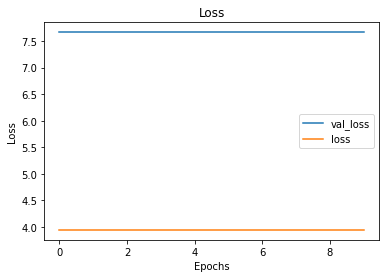

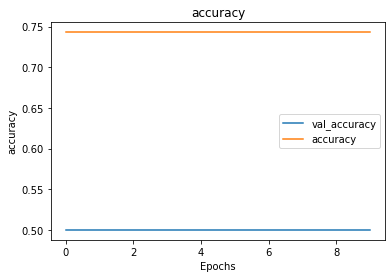

In [41]:
visualize_training_results(attempt_2)

Graph looks the same, lets keep playing with it and see if we can figure something out.  

In [43]:

attempt_3 = Sequential() 
attempt_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 1))) 
attempt_3.add(Flatten()) 
attempt_3.add(Dense(25, activation='relu'))
attempt_3.add(Dense(10, activation='relu'))
attempt_3.add(Dense(1, activation='softmax'))

attempt_3.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

Here I removed the Maxpooling layer, and tried to lessen the number of units. 

In [44]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [45]:
attempt_3 = attempt_3.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 81s 494ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_9: 0.7430 - recall_9: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_9: 0.5000 - val_recall_9: 1.0000
Epoch 2/10
164/164 [==============================] - 77s 469ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_9: 0.7430 - recall_9: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_9: 0.5000 - val_recall_9: 1.0000
Epoch 3/10
164/164 [==============================] - 77s 472ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_9: 0.7430 - recall_9: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_9: 0.5000 - val_recall_9: 1.0000
Epoch 4/10
164/164 [==============================] - 76s 463ms/step - loss: 3.9182 - accuracy: 0.7430 - precision_9: 0.7430 - recall_9: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_9: 0.5000 - val_recall_9: 1.0000
Epoch 5/10
164/164 [==============================] - 76s 46

In [46]:
acc_3 = attempt_3.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_3.model.metrics_names,acc_3))

20/20 [==============================] - 6s 320ms/step - loss: 5.7020 - accuracy: 0.6250 - precision_9: 0.6250 - recall_9: 1.0000


[('loss', 5.702048182487488),
 ('accuracy', 0.625),
 ('precision_9', 0.625),
 ('recall_9', 1.0)]

In [47]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

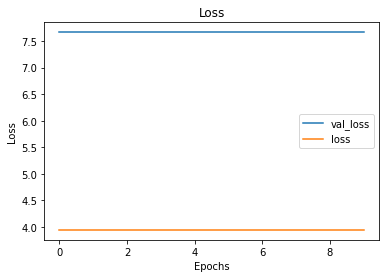

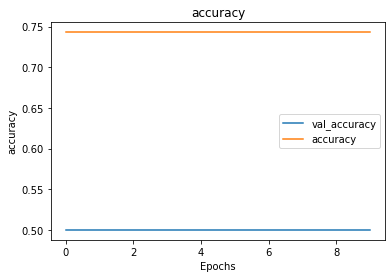

In [48]:
visualize_training_results(attempt_3)

It's bugged. 

In [53]:


attempt_4 = Sequential() 
attempt_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 1))) 
attempt_4.add(Flatten()) 
attempt_4.add(Dense(50, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
attempt_4.add(Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
attempt_4.add(Dense(1, activation='softmax'))

attempt_4.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

In [54]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [55]:
attempt_4 = attempt_4.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 109s 665ms/step - loss: 4.0342 - accuracy: 0.7430 - precision_10: 0.7430 - recall_10: 1.0000 - val_loss: 7.7822 - val_accuracy: 0.5000 - val_precision_10: 0.5000 - val_recall_10: 1.0000
Epoch 2/10
164/164 [==============================] - 112s 680ms/step - loss: 4.1234 - accuracy: 0.7430 - precision_10: 0.7430 - recall_10: 1.0000 - val_loss: 7.7815 - val_accuracy: 0.5000 - val_precision_10: 0.5000 - val_recall_10: 1.0000
Epoch 3/10
164/164 [==============================] - 117s 711ms/step - loss: 4.0326 - accuracy: 0.7430 - precision_10: 0.7430 - recall_10: 1.0000 - val_loss: 7.7807 - val_accuracy: 0.5000 - val_precision_10: 0.5000 - val_recall_10: 1.0000
Epoch 4/10
164/164 [==============================] - 115s 699ms/step - loss: 4.1219 - accuracy: 0.7430 - precision_10: 0.7430 - recall_10: 1.0000 - val_loss: 7.7800 - val_accuracy: 0.5000 - val_precision_10: 0.5000 - val_recall_10: 1.0000
Epoch 5/10
164/164 [====================

In [57]:
acc_4 = attempt_4.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_4.model.metrics_names,acc_4))

20/20 [==============================] - 8s 382ms/step - loss: 5.8110 - accuracy: 0.6250 - precision_10: 0.6250 - recall_10: 1.0000


[('loss', 5.811016464233399),
 ('accuracy', 0.625),
 ('precision_10', 0.625),
 ('recall_10', 1.0)]

In [58]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

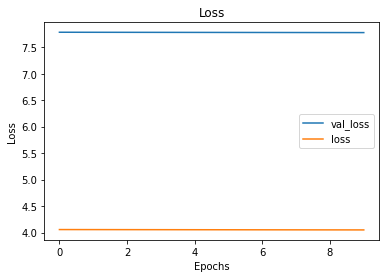

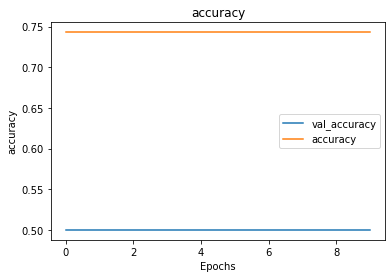

In [59]:
visualize_training_results(attempt_4)

In [70]:

attempt_5 = Sequential() 
attempt_5.add(MaxPooling2D (2, 2))
attempt_5.add(Flatten()) 
attempt_5.add(Dense(50, kernel_regularizer=regularizers.l2(0.001), activation='relu',
                    input_shape=(150, 150, 1)))
attempt_5.add(Dropout(0.5))
attempt_5.add(Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
attempt_5.add(Dropout(0.5))
attempt_5.add(Dense(1, activation='sigmoid'))

attempt_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

In [71]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [72]:
attempt_5 = attempt_5.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 59s 362ms/step - loss: 77.3285 - accuracy: 0.2687 - precision_11: 0.7436 - recall_11: 0.7529 - val_loss: 0.7867 - val_accuracy: 0.0000e+00 - val_precision_11: 0.5000 - val_recall_11: 1.0000
Epoch 2/10
164/164 [==============================] - 55s 335ms/step - loss: 0.7346 - accuracy: 0.0000e+00 - precision_11: 0.7357 - recall_11: 1.0000 - val_loss: 0.7938 - val_accuracy: 0.0000e+00 - val_precision_11: 0.5000 - val_recall_11: 1.0000
Epoch 3/10
164/164 [==============================] - 62s 378ms/step - loss: 0.7127 - accuracy: 0.0000e+00 - precision_11: 0.7380 - recall_11: 1.0000 - val_loss: 0.8044 - val_accuracy: 0.0000e+00 - val_precision_11: 0.5000 - val_recall_11: 1.0000
Epoch 4/10
164/164 [==============================] - 61s 369ms/step - loss: 0.6939 - accuracy: 0.0000e+00 - precision_11: 0.7408 - recall_11: 1.0000 - val_loss: 0.8171 - val_accuracy: 0.0000e+00 - val_precision_11: 0.5000 - val_recall_11: 1.0000
Epoch 5/10
164/

In [74]:
acc_5 = attempt_5.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_5.model.metrics_names,acc_5))

20/20 [==============================] - 5s 257ms/step - loss: 0.7651 - accuracy: 0.0000e+00 - precision_11: 0.6250 - recall_11: 1.0000


[('loss', 0.765061566233635),
 ('accuracy', 0.0),
 ('precision_11', 0.625),
 ('recall_11', 1.0)]

In [75]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

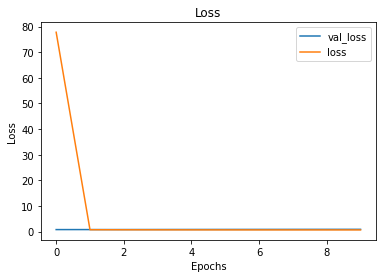

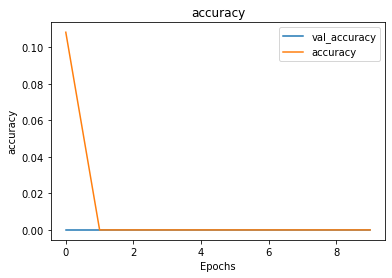

In [76]:
visualize_training_results(attempt_5)

In [77]:

attempt_6 = Sequential() 
attempt_6.add(MaxPooling2D (2, 2))
attempt_6.add(Flatten()) 
attempt_6.add(Dense(25, kernel_regularizer=regularizers.l2(0.001), activation='tanh',
                    input_shape=(150, 150, 1)))
attempt_6.add(Dropout(0.5))
attempt_6.add(Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='tanh'))
attempt_6.add(Dropout(0.5))
attempt_6.add(Dense(1, activation='softmax'))

attempt_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

In [79]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [81]:
attempt_6 = attempt_6.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 58s 353ms/step - loss: 3.9285 - accuracy: 0.7487 - precision_12: 0.7487 - recall_12: 1.0000 - val_loss: 7.6702 - val_accuracy: 0.5000 - val_precision_12: 0.5000 - val_recall_12: 1.0000
Epoch 2/10
164/164 [==============================] - 56s 342ms/step - loss: 3.9201 - accuracy: 0.7385 - precision_12: 0.7385 - recall_12: 1.0000 - val_loss: 7.6674 - val_accuracy: 0.5000 - val_precision_12: 0.5000 - val_recall_12: 1.0000
Epoch 3/10
164/164 [==============================] - 58s 356ms/step - loss: 3.9186 - accuracy: 0.7376 - precision_12: 0.7376 - recall_12: 1.0000 - val_loss: 7.6668 - val_accuracy: 0.5000 - val_precision_12: 0.5000 - val_recall_12: 1.0000
Epoch 4/10
164/164 [==============================] - 56s 339ms/step - loss: 3.9182 - accuracy: 0.7459 - precision_12: 0.7459 - recall_12: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_12: 0.5000 - val_recall_12: 1.0000
Epoch 5/10
164/164 [========================

In [82]:
acc_6 = attempt_6.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_6.model.metrics_names,acc_6))

20/20 [==============================] - 6s 287ms/step - loss: 5.7020 - accuracy: 0.6250 - precision_12: 0.6250 - recall_12: 1.0000


[('loss', 5.702048277854919),
 ('accuracy', 0.625),
 ('precision_12', 0.625),
 ('recall_12', 1.0)]

In [87]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

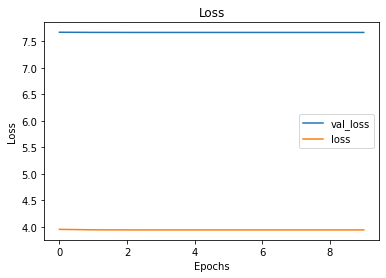

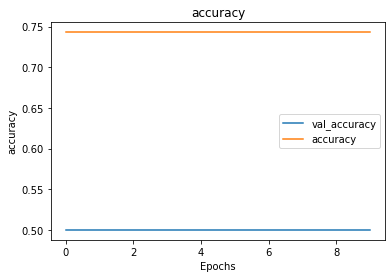

In [88]:
visualize_training_results(attempt_6)

In [83]:

attempt_7 = Sequential() 
attempt_7.add(MaxPooling2D (2, 2))
attempt_7.add(Flatten()) 
attempt_7.add(Dense(25, kernel_regularizer=regularizers.l2(0.001), activation='relu',
                    input_shape=(150, 150, 1)))
attempt_7.add(Dropout(0.5))
attempt_7.add(Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
attempt_7.add(Dropout(0.5))
attempt_7.add(Dense(1, activation='softmax'))

attempt_7.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])

In [84]:
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

In [85]:
attempt_7 = attempt_7.fit_generator(
        train_gen,
        validation_data = val_gen,
        validation_steps = validation_steps,
        epochs=10)

Epoch 1/10
164/164 [==============================] - 56s 344ms/step - loss: 3.9290 - accuracy: 0.7457 - precision_13: 0.7457 - recall_13: 1.0000 - val_loss: 7.6704 - val_accuracy: 0.5000 - val_precision_13: 0.5000 - val_recall_13: 1.0000
Epoch 2/10
164/164 [==============================] - 52s 318ms/step - loss: 4.0102 - accuracy: 0.7344 - precision_13: 0.7344 - recall_13: 1.0000 - val_loss: 7.6675 - val_accuracy: 0.5000 - val_precision_13: 0.5000 - val_recall_13: 1.0000
Epoch 3/10
164/164 [==============================] - 53s 323ms/step - loss: 3.9186 - accuracy: 0.7456 - precision_13: 0.7456 - recall_13: 1.0000 - val_loss: 7.6668 - val_accuracy: 0.5000 - val_precision_13: 0.5000 - val_recall_13: 1.0000
Epoch 4/10
164/164 [==============================] - 54s 329ms/step - loss: 3.9183 - accuracy: 0.7405 - precision_13: 0.7405 - recall_13: 1.0000 - val_loss: 7.6666 - val_accuracy: 0.5000 - val_precision_13: 0.5000 - val_recall_13: 1.0000
Epoch 5/10
164/164 [========================

In [86]:
acc_7 = attempt_7.model.evaluate_generator(test_gen, steps=len(test_gen), verbose=1)
list(zip(attempt_7.model.metrics_names,acc_7))

20/20 [==============================] - 6s 310ms/step - loss: 5.7020 - accuracy: 0.6250 - precision_13: 0.6250 - recall_13: 1.0000


[('loss', 5.702048277854919),
 ('accuracy', 0.625),
 ('precision_13', 0.625),
 ('recall_13', 1.0)]

In [89]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

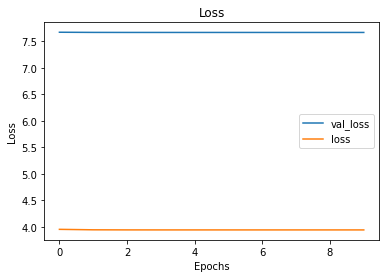

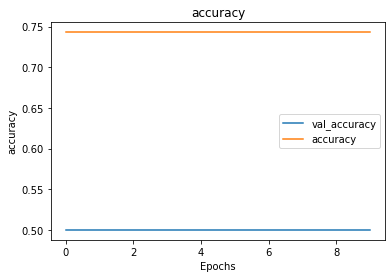

In [90]:
visualize_training_results(attempt_7)